#### Выполнил: - -
Для ввода данных выполните код в нижней ячейке

In [107]:
import math
import random
import scipy.stats as sp
import pandas as pd
from pathlib import Path
import os
from textmenu.menu import TextMenu 
from textmenu.item import TextMenuItem

global n, x0, lmbd

def load_from_csv():
    file_path = Path(os.path.abspath(os.getcwd())+"/data.csv")
    if file_path.is_file():
        return pd.read_csv('data.csv')
    return pd.DataFrame(data= {'x0': [], 'n': [], 'lambda': []})

def save_data(df):
    df.to_csv('data.csv', index=False)
    return df

def visualise_data():
    global input_data_frame
    display(input_data_frame)

def add_data (df):
    return df.append({'x0': x0, 'n': n, 'lambda': lmbd}, ignore_index=True)
   
input_data_frame = load_from_csv()

def save_inputed_data ():
    print("Новое состояние хранилища:\n")
    global input_data_frame
    input_data_frame = save_data(add_data(input_data_frame))
    visualise_data()
    
save_data_menu = TextMenu(description="Сохранить введенные данные?",items = [
TextMenuItem(description="Да", todo=[save_inputed_data,[]]),
TextMenuItem(description="Нет"),
])
    
def input_data_manually ():
    global n, x0, lmbd
    n = int(input("Введите n: " ))
    lmbd = float(input("Введите lambda: "))
    x0 = float(input("Введите x0: "))
    save_data_menu.display()

def enter_row_number():
    global n, x0, lmbd
    row_number = int(input("Введите номер записи\n"))
    row = input_data_frame.iloc[int(row_number)]
    x0, n, lmbd = float(row["x0"]), int(row["n"]), float(row["lambda"])
    print("Загружено из записи " +str(row_number)+ ":\n")
    print("x0, n, lambda = ",x0,", ",n,", ",lmbd)

load_row_menu = TextMenu(description="Выберите действие",items=[
TextMenuItem(description="Ввести номер записи", todo=[enter_row_number,[]]),
TextMenuItem(description="Назад"),
])

main_menu = TextMenu(description="Выберите способ ввода параметров",items = [
TextMenuItem(description="Ввести самостоятельно x0, n, lambda.", todo=[input_data_manually,[]]),
TextMenuItem(description="Загрузить из файла.", sub_menu = load_row_menu, todo=[visualise_data,[]],),
], default_exit=True)

load_row_menu.items[1].sub_menu = main_menu
main_menu.display()

Menu.
Выберите способ ввода параметров
0 .  Ввести самостоятельно x0, n, lambda. 
1 .  Загрузить из файла. 
2 .  Выход 
Введите номер операции: 0
Введите n: 5000
Введите lambda: 2
Введите x0: 1.5
Menu.
Сохранить введенные данные?
0 .  Да 
1 .  Нет 
Введите номер операции: 1


True

In [109]:
global x, y
x, y = [], []

def get_expected_value_theory():
    return 1/lmbd

def get_expected_value_practice():
    #return (1/n)*sum(y)
    return sp.describe(y).mean

def get_err (theory, practice):
    return (abs(theory-practice)/theory)*100

def get_expected_value_err():
    return get_err(get_expected_value_theory(), get_expected_value_practice())

def get_dispersion_theory():
    return 1/(lmbd**2) 

def get_dispersion_practice():
    squared_deviation = []
    for yi in y:
        #squared_deviation.append( abs(yi-get_expected_value_practice()) )
        squared_deviation.append( (yi-get_expected_value_practice())**2 )    
    return sum(squared_deviation)*(1/n)

def get_dispersion_err():
    return get_err(get_dispersion_theory(), get_dispersion_practice())

def get_distribution_theory(x):
    return 1-math.exp((-1)*lmbd*x) if x>0 else 0

def get_interval_count_less_x(x):
    count = 0
    for yi in y:
        if (yi < x):
            count += 1
    return count

def get_distribution_practice(x):
    return get_interval_count_less_x(x)/n

def get_distribution_err(x):
    return abs(get_distribution_theory(x)-get_distribution_practice(x))


def get_y (x):
    return (-1)*(math.log(1-x)/lmbd)


for i in range(0,n):
    #rnd_value = random.uniform(0, 1)
    rnd_value = random.random()
    x.append(rnd_value)
    y.append( get_y(rnd_value) )
    
print("Мат ожидание \n Теория:",get_expected_value_theory(),"; практика:",get_expected_value_practice(),"; отклонение:",get_expected_value_err(),"%")
print("Дисперсия \n Теория:",get_dispersion_theory(),"; практика:",get_dispersion_practice(),"; отклонение:",get_dispersion_err(),"%")
print("Функция распределения \n Теория:",get_distribution_theory(x0),"; практика:",get_distribution_practice(x0),"; отклонение:",get_distribution_err(x0))

Мат ожидание 
 Теория: 0.5 ; практика: 0.5062271761103915 ; отклонение: 1.245435222078295 %
Дисперсия 
 Теория: 0.25 ; практика: 0.2592382642402178 ; отклонение: 3.6953056960871145 %
Функция распределения 
 Теория: 0.950212931632136 ; практика: 0.9504 ; отклонение: 0.00018706836786397396


### Построение гистограммы


In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

global z
global frequency_density
z = []
frequency_density = []

def get_density_distribution(x):
    return lmbd*math.exp((-1)*lmbd*x)

def get_sturges_digit_count ():
    m = 1.44*math.log(n) + 1
    return math.ceil(m)

def get_sturges_digit_length():
    m = get_sturges_digit_count ()
    mean_length = max(y)/m

    return mean_length

def get_digits_by_count (y, z, count):
    z = np.histogram(y, density="true", bins = count, range=(0,max(y)))
    return list(z[1])  

def get_digits_with_equal_length (y, z, length):    
    m = int(max(y)/length)
    return get_digits_by_count (y, z, m)

#def get_digit_length (y,z,i):    
#    y_sorted = y[:]
#    y_sorted.sort()
#    np_hist = np.histogram(y_sorted, bins = z)
#    return np_hist[0][i]

def get_digit_length (y,z,i):    
    count = 0
    for y_i in y:
        if y_i>=z[i] and y_i<z[i+1]:
            count = count + 1
    return count

def get_digit_count (z_arr):
    return len(z_arr)-1   

def get_frequency_density ():
    global frequency_density
    frequency_density = []
    for i in range(len(z)-1):
        delta_i = z[i+1]-z[i]
        density = get_digit_length(y,z,i)/(n*delta_i)
        frequency_density.insert(i,float(density))

In [114]:
import scipy

def set_sturges_digits():
    global z
    z = get_digits_by_count (y, z, get_sturges_digit_count())

def set_digits_with_equal_height():
    global z
    z = get_digits_by_count (y, z, get_sturges_digit_count())
    
    y_sorted = y[:]
    y_sorted.sort()
    np_hist = np.histogram(y_sorted, bins = get_sturges_digit_count(), range=(0,max(y)))
    
    height = list(np_hist[0])
    height_median = scipy.median(height)
    
    h_i = 0
    z_i = 1

    while h_i <len(height):
        if height[h_i]>height_median:
            half = (z[z_i]-z[z_i-1])/2
            z.insert(z_i,z[z_i]-half)
            z_i+=2
        elif height[h_i]<height_median:
            if z_i <(len(z)-1):
                z.pop(z_i)
        else:
            z_i+=1
        h_i+=1
    
def set_digits_with_approximately_equal_height():
    global z
    z = [0]
    m = int(input("Введите количество разрядов: " ))
    y_sorted = (y[:])
    y_sorted.sort()
    
    mean_height = int(len(y)/m)
    
    for y_i in y_sorted:
        i = y_sorted.index(y_i)
        if (i+1)-((len(z)-1)*mean_height) >= mean_height:
            #print(mean_height,(i+1)-((len(z)-1)*mean_height))
            z.append(y_sorted[i])
        
        if len(z)>m:
            break
            
def set_manual_digits():
    global z
    z = [0]
    print("max(y)=",max(y),"z1=0")
    print("Введите границы разрядов.\nВвод будет продолжаться до превышения вводимым числом max(y)")
    
    while z[-1] < max(y):
        z.append(float(input("Введите следующую границу разряда: " )))
    
digit_mode_menu=TextMenu(description="Выберите способ определения разрядов гистограммы", items = [
TextMenuItem(description="Все разряды одинаковой длины. Их количество определяется формулой Стёрджеса", todo=[set_sturges_digits,[]]),
TextMenuItem(description="Разряды выбираются таким образом, чтобы в них состояло примерно одинаковое число значений", todo=[set_digits_with_approximately_equal_height,[]]),
TextMenuItem(description="Сначала разряды выбираются по формуле Стёрджеса, затем наиболее крупные делятся, а менее крупные объединяются.", todo=[set_digits_with_equal_height,[]]),
TextMenuItem(description="Ввод вручную", todo=[set_manual_digits,[]])
])
digit_mode_menu.display()

Menu.
Выберите способ определения разрядов гистограммы
0 .  Все разряды одинаковой длины. Их количество определяется формулой Стёрджеса 
1 .  Разряды выбираются таким образом, чтобы в них состояло примерно одинаковое число значений 
2 .  Сначала разряды выбираются по формуле Стёрджеса, затем наиболее крупные делятся, а менее крупные объединяются. 
3 .  Ввод вручную 
Введите номер операции: 2


True

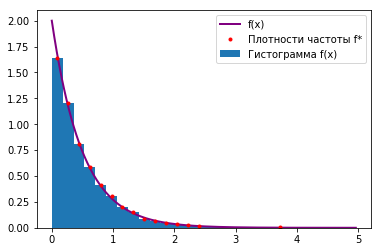

Мера похожести:  0.0034139385854391954


In [115]:
get_frequency_density ()

y_sorted= y[:]
y_sorted.sort()

#new_z = z[1:]
#sns.barplot(x = new_z, y = frequency_density)

#plt.figure()

fig, ax = plt.subplots()
plt.hist(y_sorted, density="true", bins = z, range=(0,max(y)), label=('Гистограмма f(x)'))
plot_range = np.arange(z[0],z[-1], 0.01)
plot_y = [get_density_distribution(x) for x in plot_range]
plt.plot(plot_range, plot_y, color='purple', linewidth=2, label=('f(x)'))

fz = [(z[i+1]+z[i])/2 for i in range(len(z)-1)]
plt.plot(fz, frequency_density, color="red",marker = "o",linewidth=0, markersize=3, label=('Плотности частоты f*'))
ax.legend()
plt.show()

#похожесть
def get_measure_of_similarity(): 
    deviations = []
    
    for i in range(len(z)-1):
        average_z = (z[i] + z[i+1])/2
        deviation = (get_density_distribution(average_z) - frequency_density[i])**2
        deviations.append(deviation)
    return sum(deviations)

print("Мера похожести: ", get_measure_of_similarity())


### Часть 3

In [116]:
from scipy.stats import chi2

alpha = 0.05

def enter_alpha():
    global alpha
    alpha = float(input("Введите alpha: " ))  

# R0
def get_measure_of_discrepancy(observed,expected):
    elements = [] 

    for i in range(len(observed)-1):
        r_0_i = ((observed[i] - expected[i])**2)/expected[i]
        #print(i,observed[i],expected[i],r_0_i)
        elements.append(r_0_i)
        
    return sum(elements)

def test_hypothesis (description, observed,expected,digits,degrees_of_freedom):
    print("Проверим гипотезу: \n ",description)
    
    alpha_menu=TextMenu(description="Уровень значимости равен "+str(alpha)+". Изменить?", items = [
    TextMenuItem(description="Да", todo=[enter_alpha,[]]),
    ], default_exit=True)
    alpha_menu.display()  
    
    r = degrees_of_freedom
    
    quantil_chi2 = chi2.ppf(1-alpha, r)
    
    R0 = get_measure_of_discrepancy(observed,expected)
    
    print("r степеней свободы: ",r)    
    print("R0, alpha, r = ",R0,",",alpha,",",r)
    
    if R0>=quantil_chi2:
        print("Гипотеза H0 отклоняется \n",R0,">=",quantil_chi2)
    else:
        print("Гипотеза H0 подтверждается \n",R0,"<",quantil_chi2)

In [117]:
hypothesis_description = "H0 – с.в. распределена показательно с параметром lambda = "+str(lmbd)
digit_count = get_digit_count(z)
observed = [get_digit_length(y,z,i) for i in range(digit_count)]
expected = [n*(get_distribution_theory(z[i+1])-get_distribution_theory(z[i])) for i in range(digit_count)]
test_hypothesis (hypothesis_description, observed,expected,z,digit_count-1)

Проверим гипотезу: 
  H0 – с.в. распределена показательно с параметром lambda = 2.0
Menu.
Уровень значимости равен 0.05. Изменить?
0 .  Да 
1 .  Выход 
Введите номер операции: 1
r степеней свободы:  14
R0, alpha, r =  7.693370967651874 , 0.05 , 14
Гипотеза H0 подтверждается 
 7.693370967651874 < 23.684791304840576


### Часть 4

In [118]:
import collections

tau = [sum(y[:i]) for i in range(len(y))[1:]]

print("lambda =",lmbd,"N =",n,"\n- Значение lambda*t0 желателено в пределах от 3 до 5\n- N должен быть таким, чтобы значение  m  было не меньше 100.")
    
t0 = float(input("Введите t0: " ))  
m = math.ceil(tau[-1]/t0)

print("t0 =",t0,"m =",m,"lambda*t0 =",lmbd*t0)

tau_z = []
tau_z = get_digits_with_equal_length (tau, tau_z, t0)

count_of_request = []
for i in range(len(tau_z)-1):
    count_of_request.append(get_digit_length(tau,tau_z,i))

request_count_per_holders_interval = collections.Counter(count_of_request)
#print(request_count_per_holders_interval)

table_data = dict(request_count_per_holders_interval)
table_index_order = list(table_data)
table_index_order.sort()
table_series = pd.Series(table_data, index=table_index_order)
#print(series)#,series.index,series.values)

lablels = {'counter': 'Количество заявок', 'counter_freq':'Число интервалов, на которых наблюдалось это число заявок'}
df_data = {lablels['counter']: table_series.index, lablels['counter_freq']: table_series.values}
df = pd.DataFrame(data=df_data)
df=df.set_index(lablels['counter'])
display(df.T)

lambda = 2.0 N = 5000 
- Значение lambda*t0 желателено в пределах от 3 до 5
- N должен быть таким, чтобы значение  m  было не меньше 100.
Введите t0: 2
t0 = 2.0 m = 1266 lambda*t0 = 4.0


Количество заявок,0,1,2,3,4,5,6,7,8,9,10,11,12
"Число интервалов, на которых наблюдалось это число заявок",28,96,186,247,240,196,146,72,33,11,6,2,2


In [119]:
from scipy.stats import poisson
k=max(count_of_request)
ni = list(table_series.values)
mu=lmbd*t0
mpi = [m*poisson.pmf(ki, mu) for ki in table_series.index]
hypothesis_description = "Н0 – с.в. etta(t0) распределена по закону Пуассона с параметром lambda*t0"

test_hypothesis (hypothesis_description, ni,mpi,tau_z,k)

Проверим гипотезу: 
  Н0 – с.в. etta(t0) распределена по закону Пуассона с параметром lambda*t0
Menu.
Уровень значимости равен 0.05. Изменить?
0 .  Да 
1 .  Выход 
Введите номер операции: 1
r степеней свободы:  12
R0, alpha, r =  5.714615718284711 , 0.05 , 12
Гипотеза H0 подтверждается 
 5.714615718284711 < 21.02606981748307
